# **In this code we will study k-fold cross validation on digits data available in sklearn**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [ ]:
digits = load_digits()


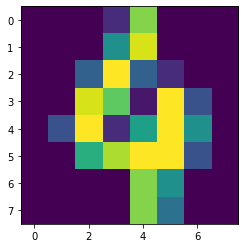

In [ ]:
# With dir function we will explore the data
dir(digits)
# Images are availabel in digits.images 
plt.imshow(digits.images[100])

In [ ]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [ ]:
# Total 10 digits 0-9 are in the target
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [ ]:

print(digits.data.shape)

(1797, 64)


So, there are 1797 total images of the size 8x8

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)

In [ ]:
x_train.shape

(1257, 64)

Logistic Regression

In [ ]:
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.9611111111111111

SVM

In [ ]:
svm = SVC(gamma='auto')
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.29444444444444445

Random **Forest**

In [ ]:
rf= RandomForestClassifier(n_estimators=50)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.9703703703703703

**KFold cross validation is used to train the model iteratively for differnt train test combination of the same data**

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits =10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [ ]:
#for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
 # print(train_index, test_index)

# **Create one generalized model training function**

In [ ]:
def obtain_score(model, x_train, x_test, y_train, y_test):
  model.fit(x_train, y_train)
  return model.score(x_test,y_test)


In [ ]:
scores_logistic = []
scores_svm=[]
scores_rf = []
for train_index, test_index in kf.split(digits.data, digits.target):
  x_train, x_test, y_train, y_test = digits.data[train_index], digits.data[test_index], digits.target[train_index], digits.target[test_index] 
  scores_logistic.append(obtain_score(LogisticRegression(solver='liblinear',multi_class='ovr'),x_train,x_test,y_train,y_test))
  scores_svm.append(obtain_score(SVC(gamma='auto'),x_train,x_test,y_train,y_test))
  scores_rf.append(obtain_score(RandomForestClassifier(n_estimators=50),x_train,x_test,y_train,y_test))

In [ ]:
np.average(scores_logistic), np.average(scores_svm), np.average(scores_rf)

(0.931530105524519, 0.4652700186219739, 0.9588175046554934)

## **Same task can be repeated with StratifiedKFols the difference is it will shuffle the data before splitting it**